### In this problem set, we will be exploring 5 problems:

Exercise 1 and Exercise 2 would give you an insight on using pandas.  
Exercise 3 will focus on cleaning the dataset for missing datapoints.  
Exercise 4 and Exercise 5 would involve generating graphs based on the traffic dataset.

This exercise discovers an extensive dataset on the subject of traffic on German roads provided by the BASt. It holds detailed numbers of cars, trucks and other vehicle groups passing more than 1,500 automatic counting stations. This dataset records for each counting station are provided on an hourly basis and they reach back to the year 2003.

# Import Libraries and Download data

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
# First, download file from http://www.bast.de/videos/2016_A_S.zip
# Then read the text file.

df_traffic = pd.read_csv(r'/Users/deekshapandit/Desktop/Big Data/2016_A_S.txt', sep = ';')

# Extract required columns and translate column names to English
df_traffic = df_traffic[['Zst', 'Land', 'KFZ_R1', 'KFZ_R2', 'Datum', 'Stunde']]
df_traffic.columns = ['nr', 'land', 'cars_r1', 'cars_r2', 'date', 'hour']

## Exercise 1: Pandas
In this exercise, print the DataFrame and you will notice that the format in which date has been provided as 161231 for 2016-12-31. Write a code to convert the 'date' to DateTime format.The resulting date should appear as '2016-01-01 01:00:00' based on your code.  You will need the hour field to build this.

In [63]:
# Convert values in 'date' column to DateTime
df_traffic.loc[df_traffic.hour == 24, 'hour'] = 0

df_traffic['hour'] = df_traffic['hour'].apply(lambda y : '0' + str(int(y)) if int(y)<10 else 0 if int(y) == 24 else y)
df_traffic['date']= df_traffic['date'].apply(lambda x : '20'+str(x)).astype(str) + df_traffic['hour'].astype(str)
df_traffic['date']=pd.to_datetime(df_traffic['date'], format = '%Y%m%d%H')
df_traffic

,nr,land,cars_r1,cars_r2,date,hour
0,8003,8,76,76,2016-01-01 01:00:00,01
1,8003,8,189,162,2016-01-01 02:00:00,02
2,8003,8,122,164,2016-01-01 03:00:00,03
3,8003,8,127,58,2016-01-01 04:00:00,04
4,8003,8,65,73,2016-01-01 05:00:00,05
...,...,...,...,...,...,...
7273147,4382,16,76,50,2016-12-31 20:00:00,20
7273148,4382,16,33,47,2016-12-31 21:00:00,21
7273149,4382,16,29,25,2016-12-31 22:00:00,22
7273150,4382,16,30,40,2016-12-31 23:00:00,23


## Exercise 2: Pandas
In this exercise, based on the total sum across time for each land, print the land parameter with the maximum traffic. You would be using indexing to indetify the land with those maximum traffic. Typically, you should be identifying the land with maximum traffic as one among the 16 values. 

In [64]:
df_sum = df_traffic.copy()
df_sum['sum'] = df_sum['cars_r1'] + df_sum['cars_r2']
df_byday_sum = df_sum.set_index('date').groupby(['land', pd.Grouper(freq = 'D')])[['sum']].sum().reset_index()
df_byday_sum = df_byday_sum.groupby('land')[['sum']].sum().reset_index()
df_byday_sum = df_byday_sum.set_index('land')
df_byday_sum[df_byday_sum['sum'] == df_byday_sum['sum'].max()].astype(int)

,sum
land,
9,5066695150


## Exercise 3: Missing Values
The code below will randomly generate indeces and remove the data points from those indices. Using a technique of filling missing data, we will try to recover the lost data in the following exercise. 

In [65]:
# Generate random indexes 
import random
import numpy as np

index = []
for x in range(1000):
    index.append(random.randint(1,3000000))
    
index = np.unique(index)
df_missing = df_traffic
df_missing.loc[index,'cars_r1'] = np.nan
df_missing.loc[index,'cars_r2'] = np.nan

In [66]:
# When you print the dataframe you will notice that the values are set to NaN. 
print(df_missing.loc[index])

           nr  land  cars_r1  cars_r2                date hour
1145     8003     8      NaN      NaN 2016-02-17 18:00:00   18
4487     8003     8      NaN      NaN 2016-07-05 00:00:00   00
4570     8003     8      NaN      NaN 2016-07-09 11:00:00   11
4637     8003     8      NaN      NaN 2016-07-12 06:00:00   06
4913     8003     8      NaN      NaN 2016-07-23 18:00:00   18
...       ...   ...      ...      ...                 ...  ...
2988074  6931     6      NaN      NaN 2016-03-04 03:00:00   03
2988779  6931     6      NaN      NaN 2016-04-02 12:00:00   12
2991984  6931     6      NaN      NaN 2016-08-14 01:00:00   01
2994527  6931     6      NaN      NaN 2016-11-27 00:00:00   00
2998403  6932     6      NaN      NaN 2016-05-07 12:00:00   12

[1000 rows x 6 columns]


### 3.1. In what conditions should NaN values be filled with mean and median? Please share your thoughts briefly.
(This is not going to count toward your grade. Hint: Consider outliers in the data)

ANSWER:
Box plots and distribution plots are both very helpful in determining if the mean or median should be filled in with NaN values. It is not advised to use the mean to replace the missing values in a box plot if there are numerous or a big number of data points that behave as outliers since they will have a substantial impact on the mean. Since using mean values to fill in missing values may not produce a good model, it is disregarded. One can impute missing values using the mean value for symmetric data distribution. 
When the data is skewed, it is wise to think about replacing the missing values with the median value.

### 3.2 Write the code to drop the rows with missing values

In [44]:
df_drop=df_missing.copy()
df_drop=df_drop.dropna()
df_drop

,nr,land,cars_r1,cars_r2,date,hour
0,8003,8,76.0,76.0,2016-01-01 01:00:00,01
1,8003,8,189.0,162.0,2016-01-01 02:00:00,02
2,8003,8,122.0,164.0,2016-01-01 03:00:00,03
3,8003,8,127.0,58.0,2016-01-01 04:00:00,04
4,8003,8,65.0,73.0,2016-01-01 05:00:00,05
...,...,...,...,...,...,...
7273147,4382,16,76.0,50.0,2016-12-31 20:00:00,20
7273148,4382,16,33.0,47.0,2016-12-31 21:00:00,21
7273149,4382,16,29.0,25.0,2016-12-31 22:00:00,22
7273150,4382,16,30.0,40.0,2016-12-31 23:00:00,23


### 3.3 Fill the value with the previous timestamp value


In [67]:
df_fill = df_missing.copy()
df_fill = df_fill.fillna(method='ffill')
df_fill

,nr,land,cars_r1,cars_r2,date,hour
0,8003,8,76.0,76.0,2016-01-01 01:00:00,01
1,8003,8,189.0,162.0,2016-01-01 02:00:00,02
2,8003,8,122.0,164.0,2016-01-01 03:00:00,03
3,8003,8,127.0,58.0,2016-01-01 04:00:00,04
4,8003,8,65.0,73.0,2016-01-01 05:00:00,05
...,...,...,...,...,...,...
7273147,4382,16,76.0,50.0,2016-12-31 20:00:00,20
7273148,4382,16,33.0,47.0,2016-12-31 21:00:00,21
7273149,4382,16,29.0,25.0,2016-12-31 22:00:00,22
7273150,4382,16,30.0,40.0,2016-12-31 23:00:00,23


In [73]:
df_fill.loc[1145]

nr                        8003
land                         8
cars_r1                  970.0
cars_r2                 1427.0
date       2016-02-17 18:00:00
hour                        18
Name: 1145, dtype: object

### 3.4 Fill the value with a constant

In [70]:
df_const = df_missing.copy()
df_const = df_const.fillna(3)
df_const

,nr,land,cars_r1,cars_r2,date,hour
0,8003,8,76.0,76.0,2016-01-01 01:00:00,01
1,8003,8,189.0,162.0,2016-01-01 02:00:00,02
2,8003,8,122.0,164.0,2016-01-01 03:00:00,03
3,8003,8,127.0,58.0,2016-01-01 04:00:00,04
4,8003,8,65.0,73.0,2016-01-01 05:00:00,05
...,...,...,...,...,...,...
7273147,4382,16,76.0,50.0,2016-12-31 20:00:00,20
7273148,4382,16,33.0,47.0,2016-12-31 21:00:00,21
7273149,4382,16,29.0,25.0,2016-12-31 22:00:00,22
7273150,4382,16,30.0,40.0,2016-12-31 23:00:00,23


In [74]:
df_const.loc[1145]

nr                        8003
land                         8
cars_r1                    3.0
cars_r2                    3.0
date       2016-02-17 18:00:00
hour                        18
Name: 1145, dtype: object

### 3.5 Fill the value with the mean of value above and below (time-wise) the datapoint

In [75]:
df_mean = df_missing.copy()
df_mean[['cars_r1','cars_r2']] = (df_mean[['cars_r1', 'cars_r2']].fillna(method='ffill')+df_mean[['cars_r1', 'cars_r2']].fillna(method='bfill'))/2
df_mean

,nr,land,cars_r1,cars_r2,date,hour
0,8003,8,76.0,76.0,2016-01-01 01:00:00,01
1,8003,8,189.0,162.0,2016-01-01 02:00:00,02
2,8003,8,122.0,164.0,2016-01-01 03:00:00,03
3,8003,8,127.0,58.0,2016-01-01 04:00:00,04
4,8003,8,65.0,73.0,2016-01-01 05:00:00,05
...,...,...,...,...,...,...
7273147,4382,16,76.0,50.0,2016-12-31 20:00:00,20
7273148,4382,16,33.0,47.0,2016-12-31 21:00:00,21
7273149,4382,16,29.0,25.0,2016-12-31 22:00:00,22
7273150,4382,16,30.0,40.0,2016-12-31 23:00:00,23


## Exercise 4: Plot

# Plot the line chart to identify the number of cars_r1 and cars_r2 vs. date with different colors and legends.

Using the `station` and `station_days`. Analyze what station and station_days represent and how they should be used. It is pretty straight forward.
The plots have been generated and given below for your reference. The code writtern should generate similar graphs. 

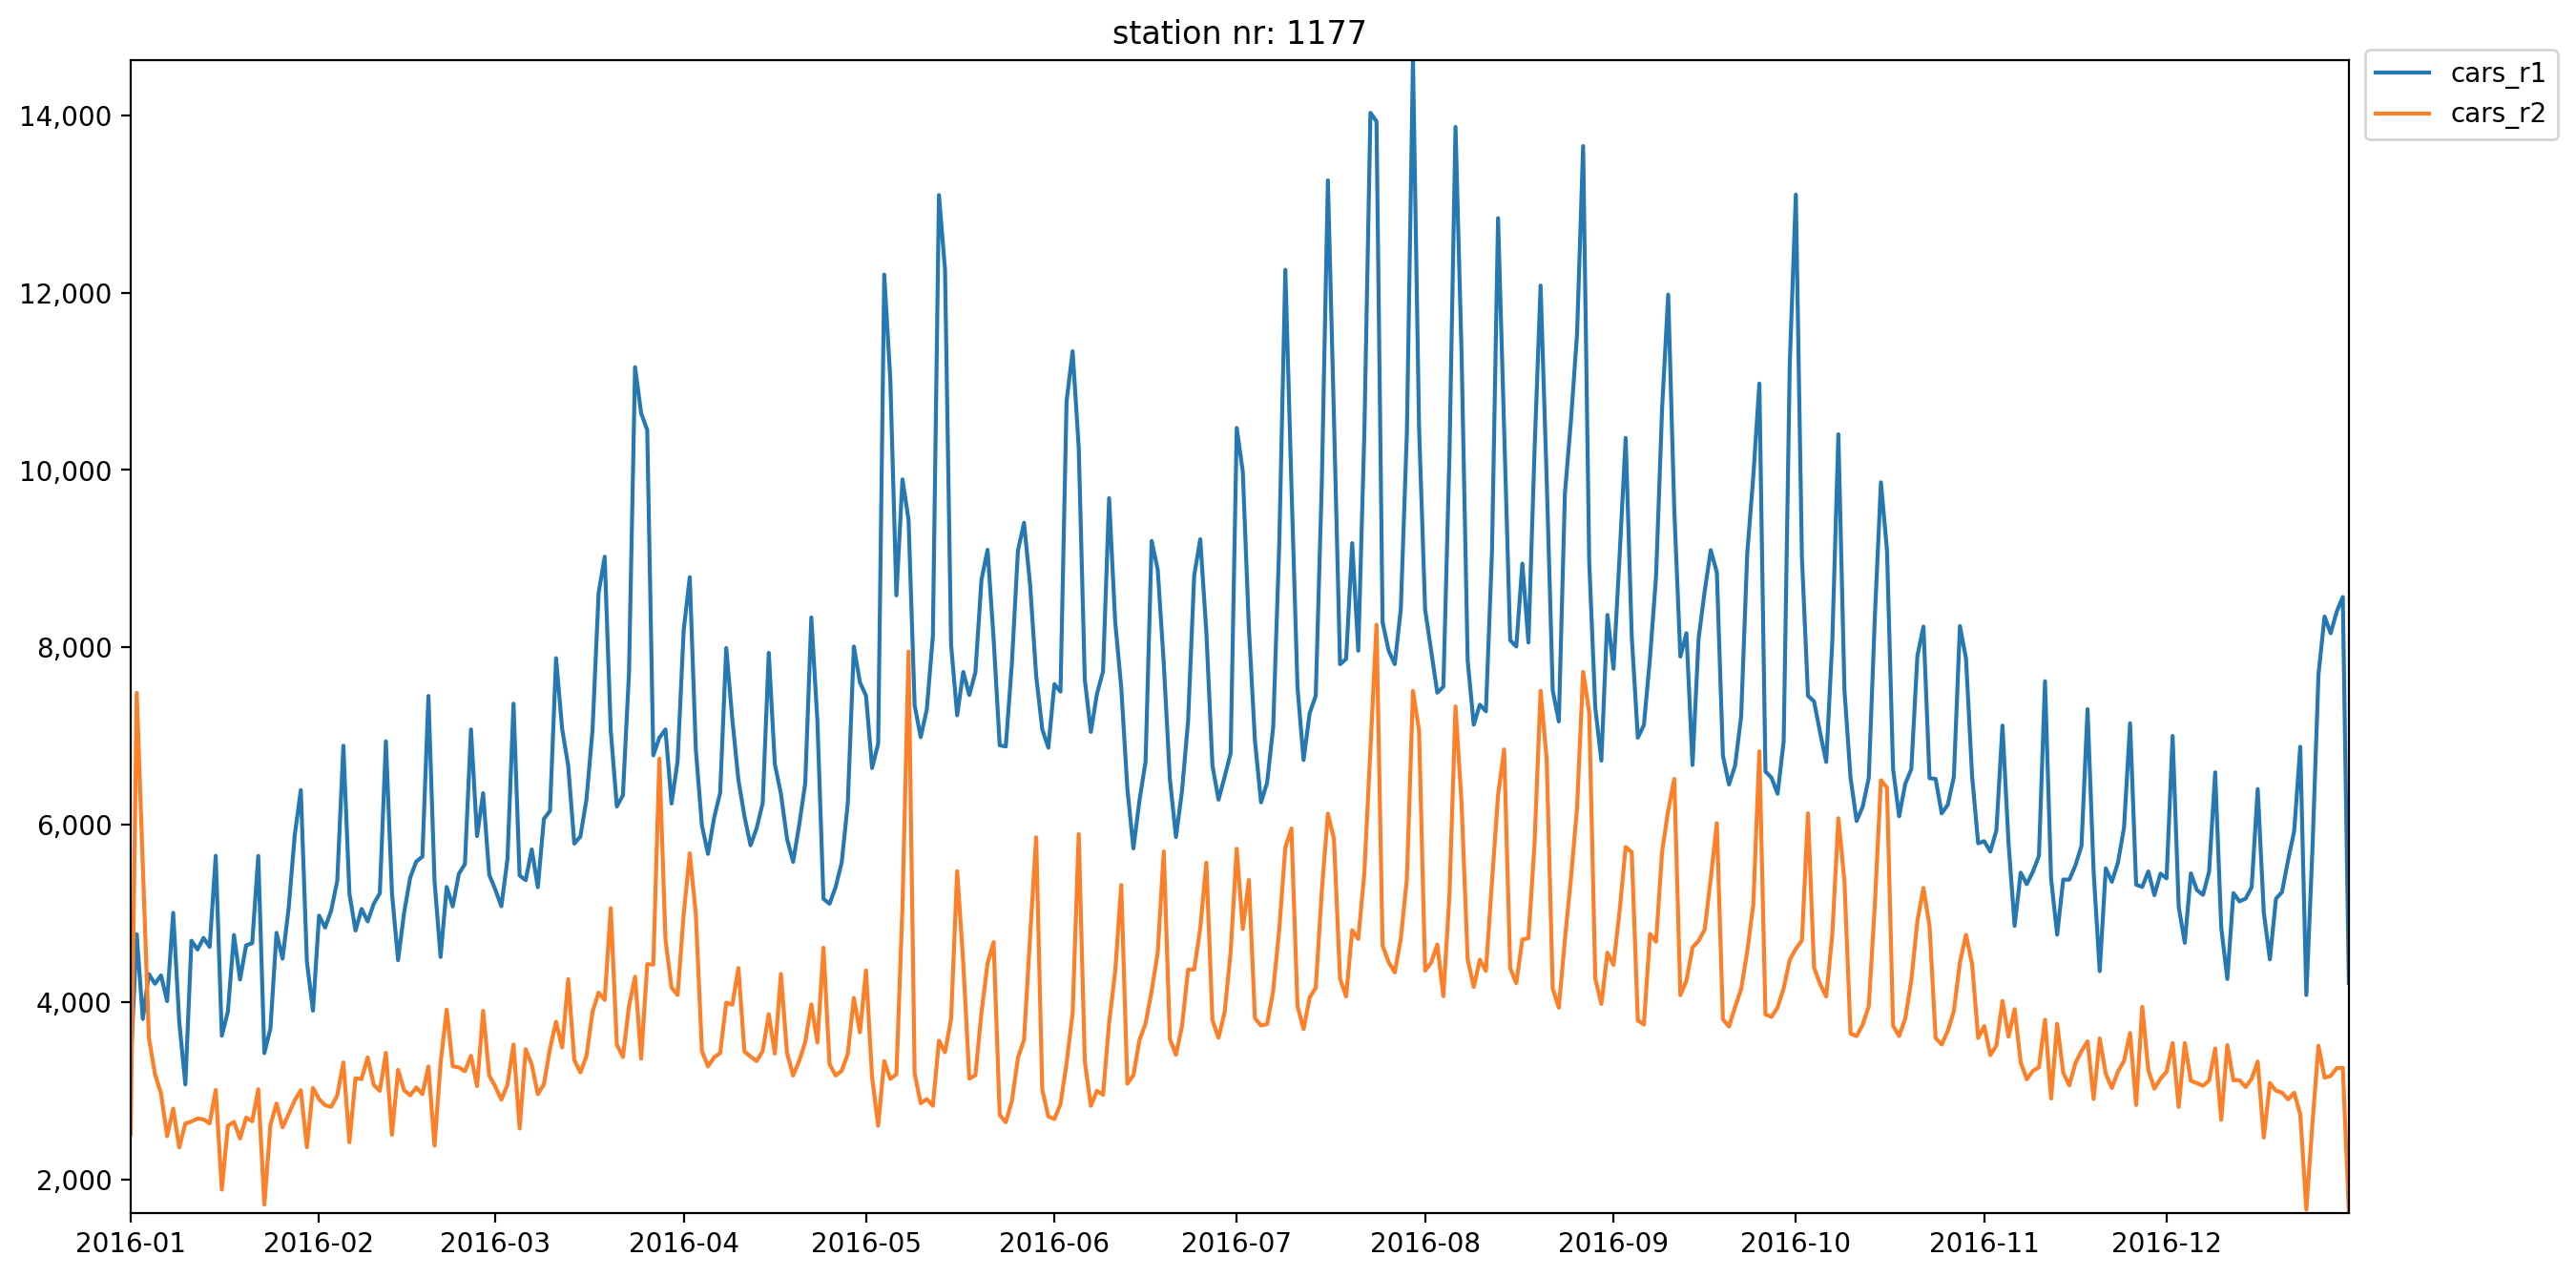

In [76]:
%matplotlib inline

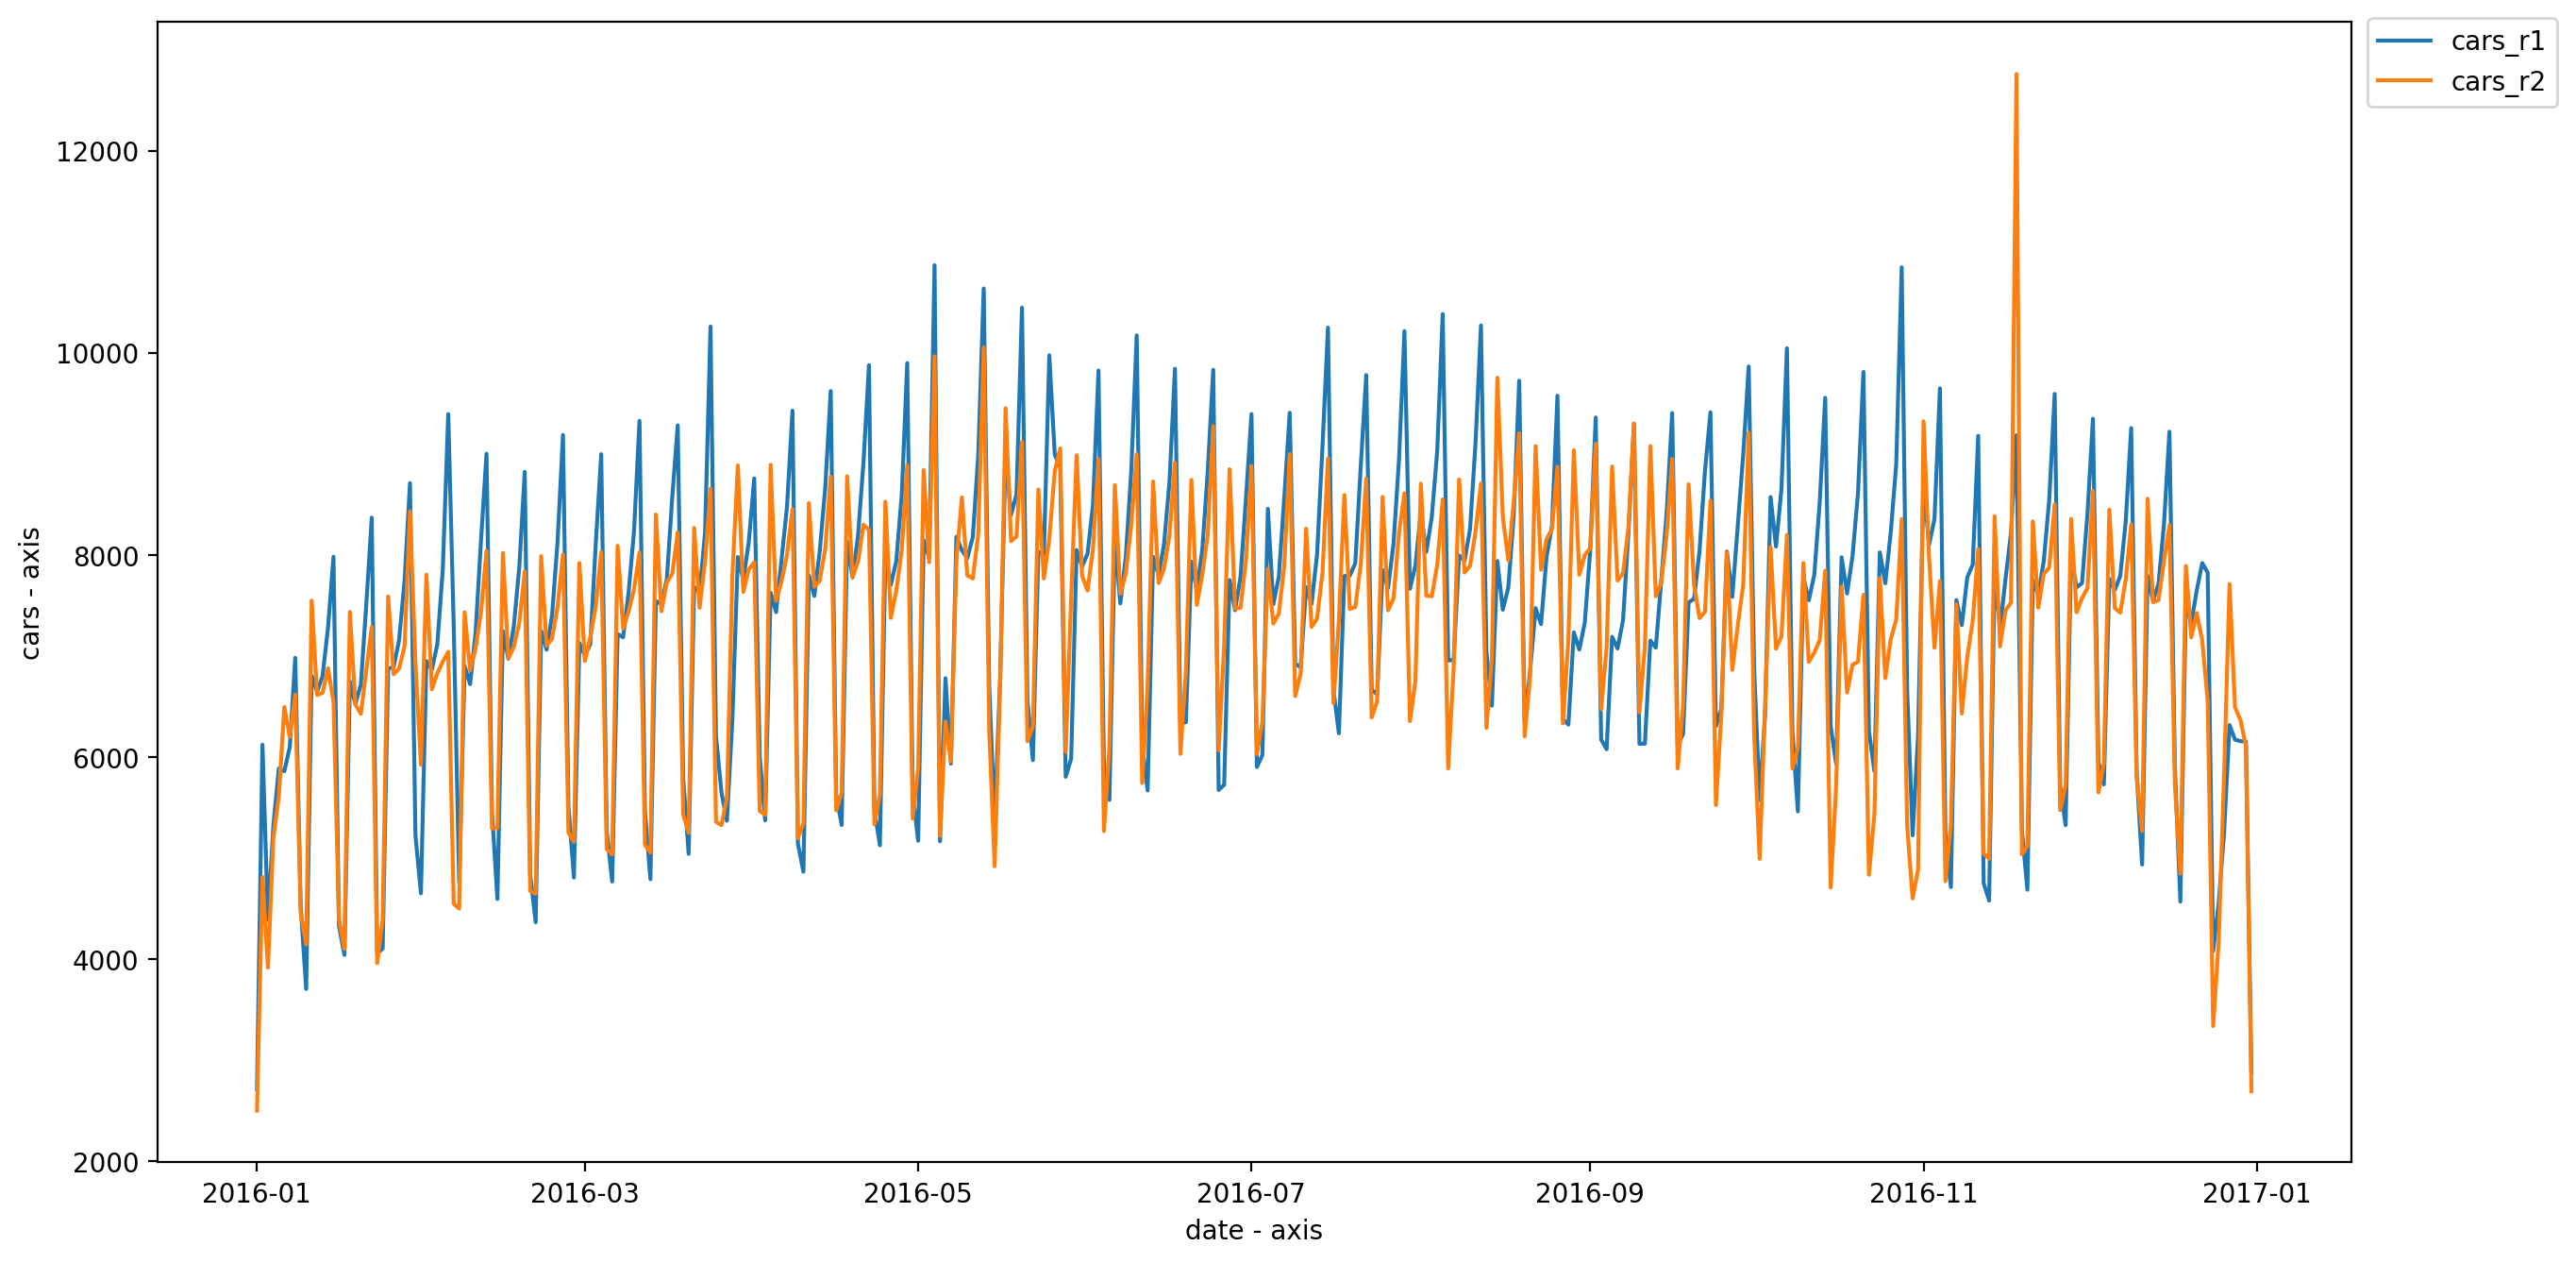

In [77]:
grouped_by_name = df_traffic.groupby(['nr'])

number = 4382
station = grouped_by_name.get_group(number)
station_days = station.set_index('date').groupby([pd.Grouper(freq = 'D')])[['cars_r1', 'cars_r2']].sum().reset_index()

fig, ax = plt.subplots(figsize = (15, 8), dpi=200)
ax.plot(station_days['date'], station_days['cars_r1'], label="cars_r1")
ax.plot(station_days['date'], station_days['cars_r2'], label="cars_r2")
plt.xlabel('date - axis')
plt.ylabel('cars - axis')
ax.legend(loc = 'upper right', bbox_to_anchor = (1.1, 1.015))

## Exercise 5: Plot the scatter plot for the top 3 busiest days per state
### Plot the different group of land vs. date and show the 3 busiest days using the below DataFrames generated.

In [78]:
df_scatter = df_traffic.copy()
df_scatter['sum'] = df_scatter['cars_r1'] + df_scatter['cars_r2']
df_byday = df_scatter.set_index('date').groupby(['land', pd.Grouper(freq = 'D')])[['sum']].sum().reset_index()
df_sorted = df_byday.sort_values(by=['sum'], ascending = False)
df_clean = df_sorted.groupby(['land']).head(3)

#### You have to just write one line inside the for loop and plot.

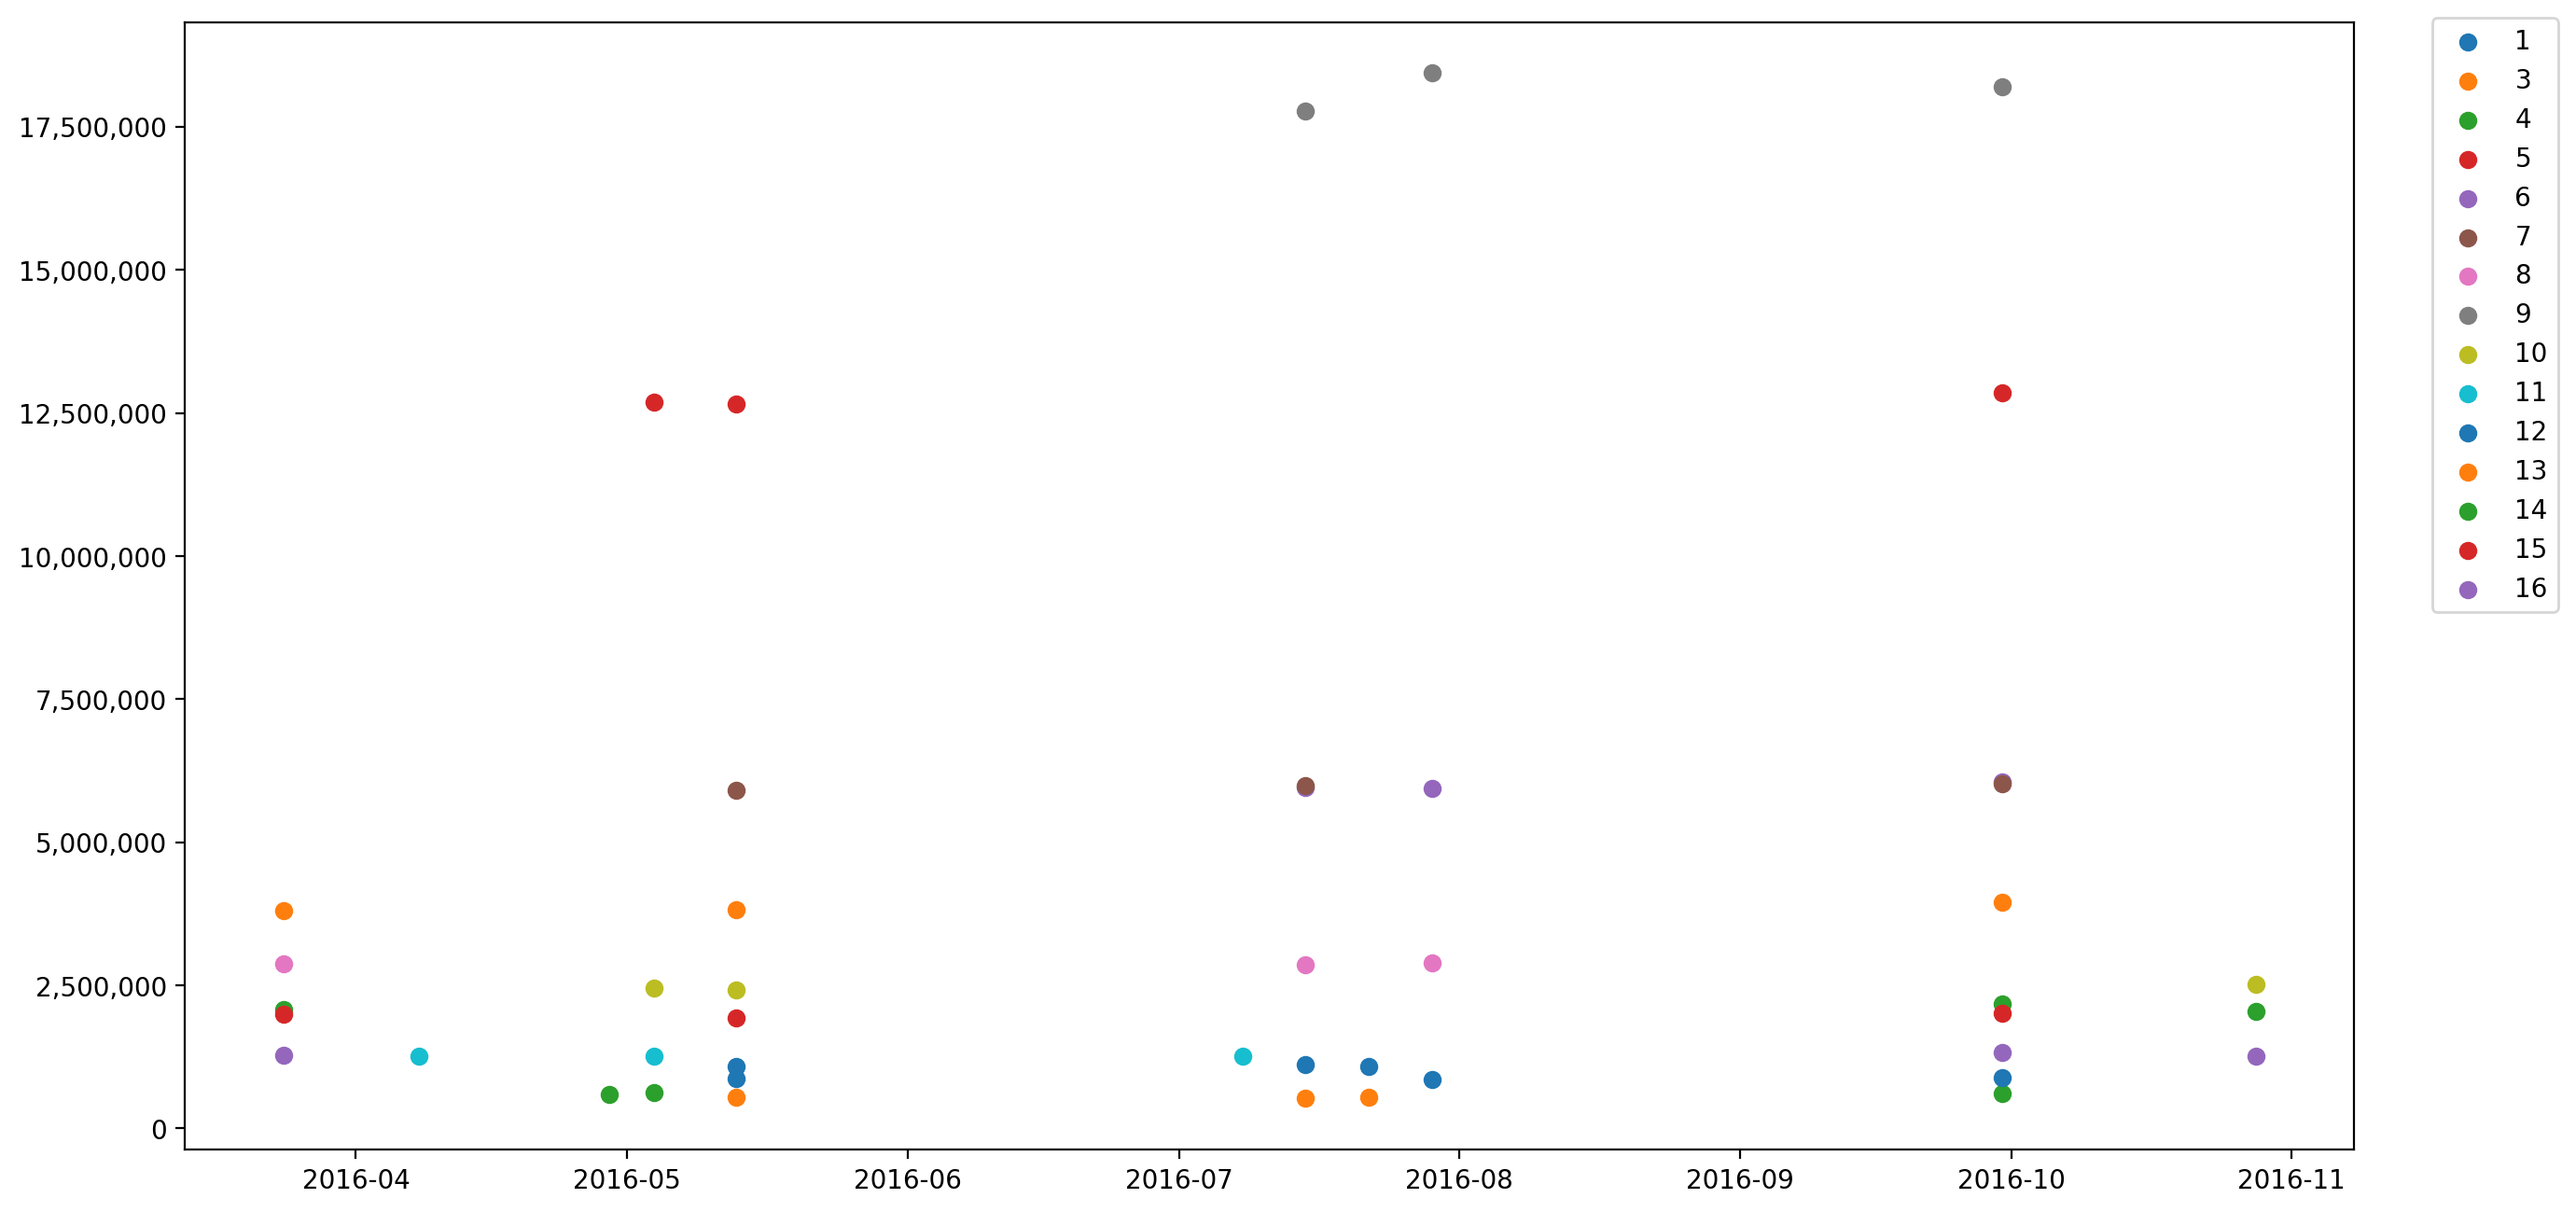

In [79]:
colors = ['#2678B2', '#AFC8E7', '#FD7F28', '#FDBB7D', 
          '#339E34', '#9ADE8D', '#D42A2F', '#FD9898', 
          '#9369BB', '#C5B1D4', '#8B564C', '#C39C95', 
          '#E179C1', '#F6B7D2', '#7F7F7F', '#C7C7C7']

groups = df_clean.groupby('land')
scatter_colors = iter(colors)

fig, ax = plt.subplots(figsize = (15, 8), dpi=200)
for name, group in groups:
    dates = group['date'].dt.strftime('%Y-%m-%d').values
    dates = [pd.to_datetime(d) for d in dates]
    
    # ONE line to insert here for to plot.
    ax.scatter(dates, group['sum'].values, label=name)
    
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
ax.legend(loc = 'upper right', bbox_to_anchor = (1.1, 1.015))
plt.show()